# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [254]:
#Dependencies
import requests
import json
from api_keys import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import random
from citipy import citipy
import scipy.stats as st
import csv



In [255]:
#Urls and API Keys
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url = url + "appid=" + api_key + "&q={name}"
query_url = url + "appid=" + api_key + "&q=houston" + "&units=imperial"

In [256]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
    
#print(query_url)
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1599945017,
 'id': 4699066,
 'main': {'feels_like': 93.67,
          'humidity': 46,
          'pressure': 1010,
          'temp': 92.93,
          'temp_max': 95,
          'temp_min': 91},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4850,
         'sunrise': 1599912293,
         'sunset': 1599957026,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 11.41}}


## Generate Cities List

In [257]:
#generating coordinates
#random.randint(0,9)
coordinates = [(random.uniform(-1, 1)*70, random.uniform(-1, 1)*70) for _ in range(10)]
#coord_df = pd.DataFrame(coordinates)
#coordinates_df= coord_df.rename(columns={"0":"Latitude", "1":"Longitude"})
#coordinates_df
print(coordinates)

[(-11.547949605455692, -45.52533936724974), (61.18728088190475, 0.4655027773537501), (-24.520042997038043, 1.1725111963815116), (-54.10821813121249, 31.069589697941616), (-59.80195112026731, 43.385645180646556), (48.5071984783598, 39.046497351146876), (-3.639000713957845, -30.985172888184806), (22.737949498747124, 26.15223776176459), (23.537857410634622, -50.123109352559005), (-32.39686370535951, -47.382195892447164)]


In [258]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon).city_name)
print(cities)


['riachao das neves', 'lerwick', 'jamestown', 'port elizabeth', 'east london', 'beloye', 'natal', 'tahta', 'codrington', 'cidreira']


In [259]:
#All individual variables are reading the json response ap
#pressure = []
#lon = []
#lat = []
#cloud = []
#wind = []
#temp = []

#for city in cities:
    #response = requests.get(query_url + city).json()
response = weather_json
temp = response['main']['temp']
humidity = response['main']['humidity']
cloud = response['clouds']['all']
wind = response['wind']['speed']
print(cloud)
    #country_code = city.country_code
    #name = city.city_name
    #lon = lon.append(response['coord']['lon'])
    #lat = lat.append(response['coord']['lat'])
    #humidity = pressure.append(response['main']['humidity'])
    #cloud = cloudiness.append(response['clouds']['all'])
    
    #print(f"The country code of {name} is '{country_code}'.")

40


In [261]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key +  "&units=imperial" +"&q="
lon = []
lat = []
cloud = []
wind = []
temp = []
humidity =[]
max_temp = []
country = []
date = []
name = []
count_sets = 1
cities_count = 1
for city in cities:
    #country_code = city.country_code
   
        
    #count_sets = (count_sets(cities_counts = 50)+1)
    request_url = query_url + city
    #print(cities_count)
   
    try:
        response = requests.get(request_url).json()
        
    #print(f"The country code of {name} is '{country_code}'.")
    #weather_response = requests.get(query_url)
    #weather_json = weather_response.json()
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(city)
        print(f"Processing Record ", cities_count , " of set " , count_sets, " | ", city)
    except KeyError:
        print("City not found. Skipping...")  
        #print("removing " + {city.name})
        cities.remove(city)
    if cities_count < 50:
        cities_count = cities_count + 1
    else: 
        cities_count = 0
        count_sets = count_sets + 1
#rint(cities)
#rint(lat)
    

Processing Record  1  of set  1  |  riachao das neves
Processing Record  2  of set  1  |  lerwick
Processing Record  3  of set  1  |  jamestown
Processing Record  4  of set  1  |  port elizabeth
Processing Record  5  of set  1  |  east london
Processing Record  6  of set  1  |  beloye
Processing Record  7  of set  1  |  natal
Processing Record  8  of set  1  |  tahta
Processing Record  9  of set  1  |  codrington
Processing Record  10  of set  1  |  cidreira


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [267]:
weather_data = {"City": name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date}
weather_data = pd.DataFrame(weather_data)
weather_data

weather_data.to_csv("cityDataFile.csv", sep=',')

In [265]:
#Weather Stats
weather_stats = weather_data.describe()
weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,2.459000,5.52800,68.318000,55.200000,39.500000,11.218000,1.599945e+09
std,38.277854,63.12055,13.341706,27.879901,42.395623,6.387952,5.748971e+01
min,-38.270000,-79.24000,45.370000,22.000000,0.000000,3.020000,1.599945e+09
25%,-32.310000,-42.48500,56.577500,29.250000,0.750000,7.040000,1.599945e+09
50%,-8.770000,12.21000,74.200000,55.000000,29.000000,9.595000,1.599945e+09
75%,38.267500,30.60250,78.182500,75.250000,78.750000,15.612500,1.599945e+09
max,60.150000,141.97000,83.140000,96.000000,100.000000,24.160000,1.599945e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [228]:
    low_humidity = weather_stats.iloc[7]['Humidity']
    low_humidity
    if low_humidity < 100:
        print("All cities under 100% humidity")
        clean_data_df = weather_data
    else:
        #TODO remove cities that have humidity value greather than 100
        print("One or more cities greater than 100% humidity")
        clean_data_df =weather_data

clean_data_df
    #humidity_df = mouse_data_nodupes_df[mouse_data_nodupes_df['Drug Regimen'] == drug]


One or more cities greater than 100% humidity


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,41.00,86,40,3.36,AR,1599939445
1,port alfred,-33.59,26.89,77.23,32,98,7.34,ZA,1599939446
2,wageningen,51.97,5.67,61.00,87,90,3.36,NL,1599939446
3,saldanha,-33.01,17.94,62.60,77,99,4.70,ZA,1599939446
4,touros,-5.20,-35.46,80.60,61,20,16.11,BR,1599939447
...,...,...,...,...,...,...,...,...,...
85,cape town,-33.93,18.42,63.00,93,40,20.80,ZA,1599939374
86,road town,18.42,-64.62,84.20,74,20,3.36,VG,1599939444
87,planaltina,-15.45,-47.61,87.80,20,0,16.11,BR,1599939465
88,cuxhaven,53.87,8.69,59.00,72,75,11.41,DE,1599939712


In [229]:
#  Get the indices of cities that have humidity over 100%.


In [230]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

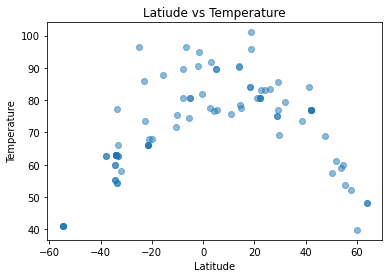

In [231]:
plt.title("Latiude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(clean_data_df["Lat"], clean_data_df["Max Temp"], alpha = 0.5)
plt.savefig('lat_v_temp.png')


## Latitude vs. Humidity Plot

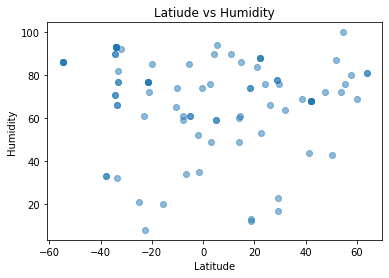

In [232]:
plt.title("Latiude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(clean_data_df["Lat"], clean_data_df["Humidity"], alpha = 0.5)
plt.savefig('lat_v_humid.png')


## Latitude vs. Cloudiness Plot

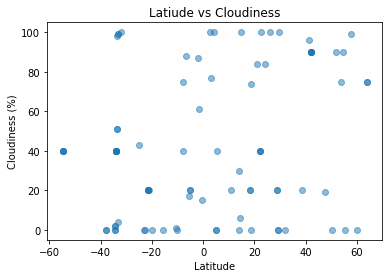

In [233]:
plt.title("Latiude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(clean_data_df["Lat"], clean_data_df["Cloudiness"], alpha = 0.5)
plt.savefig('lat_v_cloud.png')


## Latitude vs. Wind Speed Plot

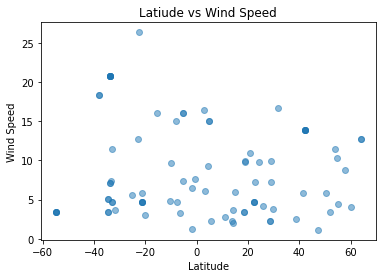

In [252]:
plt.title("Latiude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(clean_data_df["Lat"], clean_data_df["Wind Speed"], alpha = 0.5)
plt.savefig('lat_v_wind.png')


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [235]:
#Northern Hemisphere Calculations
northern_hemisphere_df = clean_data_df[clean_data_df['Lat'] > 0] 
northern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,wageningen,51.97,5.67,61.00,87,90,3.36,NL,1599939446
5,sur,22.57,59.53,83.25,53,100,7.23,OM,1599939447
7,grindavik,63.84,-22.43,48.20,81,75,12.75,IS,1599939447
8,los llanos de aridane,28.66,-17.92,75.20,78,20,2.24,ES,1599939448
9,bam,29.11,58.36,76.80,17,0,9.93,IR,1599939448
10,praia da vitoria,38.73,-27.07,73.40,69,20,2.51,PT,1599939700
13,nanortalik,60.14,-45.24,39.78,69,0,4.09,GL,1599939448
15,krasnomayskiy,57.62,34.41,52.18,80,99,8.79,RU,1599939449
17,jamestown,42.10,-79.24,77.00,68,90,13.87,US,1599939192
18,cayenne,4.93,-52.33,89.60,59,0,14.99,GF,1599939266


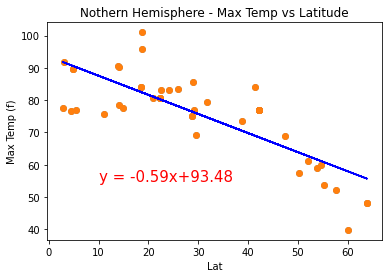

In [236]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Max Temp"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Max Temp"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(10,55),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Max Temp (f)')
plt.savefig('northhem_maxtemp_lat.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [237]:
#Southern Hemisphere - 
southern_hemisphere_df = clean_data_df[clean_data_df['Lat'] < 0] 
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,41.00,86,40,3.36,AR,1599939445
1,port alfred,-33.59,26.89,77.23,32,98,7.34,ZA,1599939446
3,saldanha,-33.01,17.94,62.60,77,99,4.70,ZA,1599939446
4,touros,-5.20,-35.46,80.60,61,20,16.11,BR,1599939447
6,ushuaia,-54.80,-68.30,41.00,86,40,3.36,AR,1599939445
11,cape town,-33.93,18.42,63.00,93,40,20.80,ZA,1599939374
12,yhu,-25.05,-55.92,96.40,21,43,5.53,PY,1599939448
14,saint-philippe,-21.36,55.77,66.20,77,20,4.70,RE,1599939449
16,arraial do cabo,-22.97,-42.03,86.00,61,0,12.75,BR,1599939449
19,cabinda,-5.55,12.20,74.57,85,17,7.43,AO,1599939450


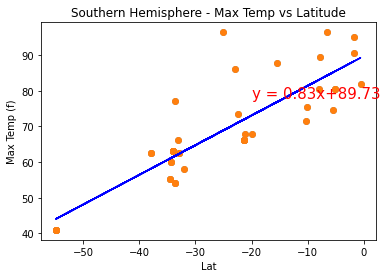

In [238]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Max Temp"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Max Temp"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-20,78),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Max Temp (f)')
plt.savefig('southhem_maxtemp_lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

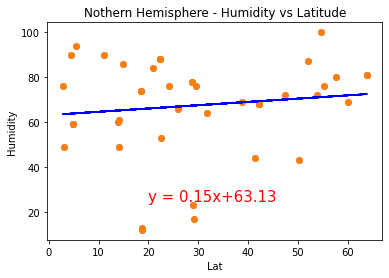

In [239]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Humidity"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Humidity"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.savefig('northhem_humid_lat.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

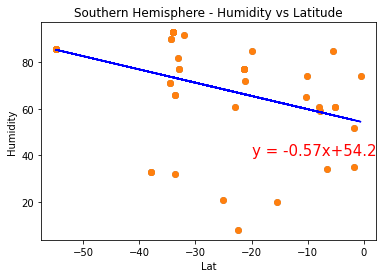

In [240]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Humidity"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Humidity"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.savefig('southhem_humid_lat.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

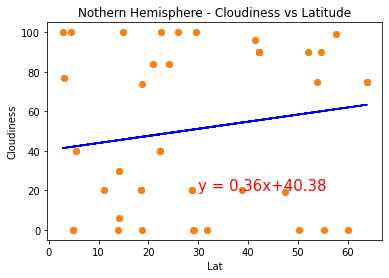

In [241]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Cloudiness"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Cloudiness"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.title("Nothern Hemisphere - Cloudiness vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig('northhem_cloud_lat.png')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

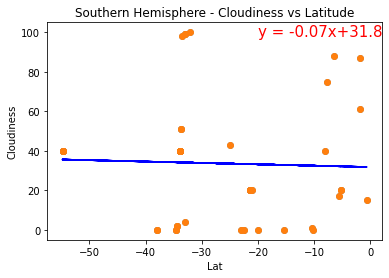

In [242]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Cloudiness"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Cloudiness"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-20,98),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig('southhem_cloud_lat.png')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

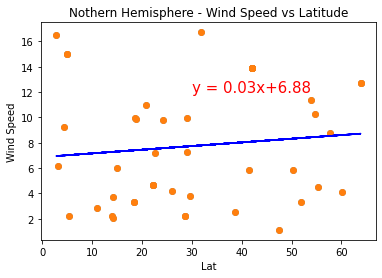

In [243]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Wind Speed"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Wind Speed"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.savefig('northhem_windsp_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

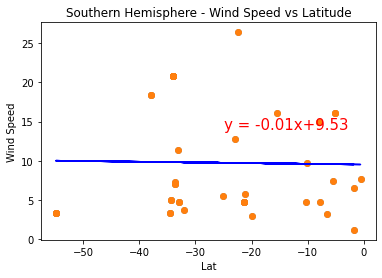

In [251]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Wind Speed"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Wind Speed"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(-25,14),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.savefig('southhem_windsp_lat.png')
plt.show()
